In [1]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from datasets import Dataset
import json
import os

# Specify dataset paths
caption_file = '/content/drive/MyDrive/Bangla Image dataset with caption/Flickr8k_Dataset/BAN-Cap_captiondata.json'
image_dir = '/content/drive/MyDrive/Bangla Image dataset with caption/Flickr8k_Dataset/Flicker8k_Dataset'

# Load the JSON file
with open(caption_file, 'r') as f:
    captions_data = json.load(f)

# Prepare data dictionary
data = {
    'image': [],
    'text': []
}

# Assuming the JSON structure contains a list of items with 'caption_id' and 'bengali_caption'
for item in captions_data:
    image_file = item['caption_id'].split('#')[0]
    caption = item['bengali_caption']
    full_image_path = os.path.join(image_dir, image_file)
    if os.path.exists(full_image_path):
        data['image'].append(full_image_path)
        data['text'].append(caption)

# Convert to Hugging Face Dataset and save to JSON Lines (.jsonl) format
dataset = Dataset.from_dict(data)
output_path = '/content/bangla_text_image_dataset.jsonl'
dataset.to_json(output_path)
print(f"Dataset saved to {output_path}")


Creating json from Arrow format:   0%|          | 0/41 [00:00<?, ?ba/s]

Dataset saved to /content/bangla_text_image_dataset.jsonl


In [4]:
!pip install diffusers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 47.0 MB/s eta 0:00:00


In [5]:
from transformers import AutoTokenizer, AutoModel
from diffusers import StableDiffusionPipeline
import torch

# Load a multilingual CLIP tokenizer
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-large-patch14")

# Load the Stable Diffusion pipeline and configure with the multilingual CLIP tokenizer
pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.tokenizer = tokenizer  # Replace default tokenizer
pipeline.to("cuda")

# Now the model is ready to be used for generating images


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizerFast"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [6]:
!accelerate launch train_text_to_image.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --dataset_name="/content/bangla_text_image_dataset.jsonl" \
  --caption_column="text" \
  --image_column="image" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=3 \
  --mixed_precision="fp16" \
  --use_ema \
  --instance_prompt="একটি মেয়ে" \
  --learning_rate=1e-4 \
  --gradient_checkpointing \
  --snr_gamma=5.0 \
  --lr_scheduler="constant" \
  --output_dir="bangla_text_image_model"


The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
/usr/bin/python3: can't open file '/content/train_text_to_image.py': [Errno 2] No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/accelerate", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/accelerate_cli.py", line 48, in main
    args.func(args)
  File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py", line 1174, in launch_command
    simple_launcher(args)
  File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/launch.py", line 769, in simple_launcher
    raise subprocess.CalledProc

# Hugging face tokenization

In [7]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


In [8]:
!accelerate config default


accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [9]:
from huggingface_hub import notebook_login

# Authenticate within the notebook; you will be prompted to input your Hugging Face token
notebook_login()


In [11]:
from huggingface_hub import create_repo, upload_folder

# Save the model
pipeline.save_pretrained("bangla_text_image_model")

# Create a new repository and upload the model files
repo_id = "Mansuba/Bangla_Text_Image_Model"
create_repo(repo_id, exist_ok=True)
upload_folder(folder_path="bangla_text_image_model", repo_id=repo_id)


No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/Mansuba/Bangla_Text_Image_Model/commit/e79e9a794ac3ed942fb4f4433ae53d61feb0191f', commit_message='Upload folder using huggingface_hub', commit_description='', oid='e79e9a794ac3ed942fb4f4433ae53d61feb0191f', pr_url=None, pr_revision=None, pr_num=None)

# Load the Trained Model and Generate an Image

## Generated image with multiLigual clip

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

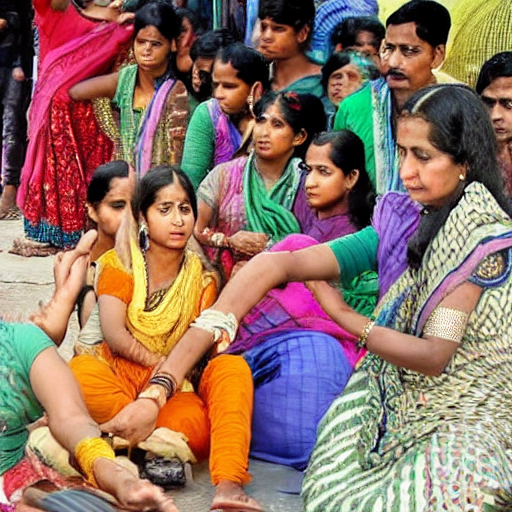

In [12]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from IPython.display import display

# Load the trained model from the local directory
output_dir = "bangla_text_image_model"
pipeline = StableDiffusionPipeline.from_pretrained(output_dir, torch_dtype=torch.float16)
pipeline.to("cuda")  # Use GPU for faster inference if available

# Define a Bangla text prompt for image generation
bangla_prompt = "একটি মেয়ে"

# Generate an image using the prompt
generated_image = pipeline(prompt=bangla_prompt).images[0]

# Display the generated image
display(generated_image)

# Optionally save the generated image
generated_image.save("generated_image.png")


#Gnerating image with bangla bert

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


  0%|          | 0/50 [00:00<?, ?it/s]

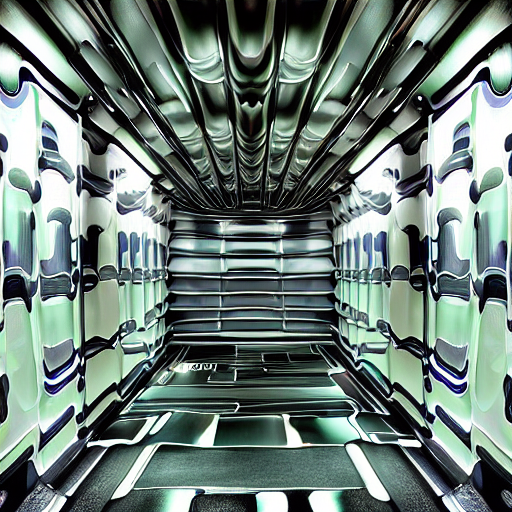

In [13]:
from transformers import AutoTokenizer, AutoModel
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display
from PIL import Image

# Load Bangla BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")
text_encoder = AutoModel.from_pretrained("csebuetnlp/banglabert").to("cuda")

# Load the Stable Diffusion pipeline
pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

# Override the pipeline's text encoder with Bangla BERT
pipeline.tokenizer = tokenizer
pipeline.text_encoder = text_encoder

# Move pipeline to GPU
pipeline.to("cuda")

# Define a Bangla prompt and prepare it
bangla_prompt = "একটি নীল টি-শার্ট পরা একটি মেয়ে"
inputs = tokenizer(bangla_prompt, return_tensors="pt").to("cuda")

# Generate image using Bangla BERT embeddings
with torch.no_grad():
    text_embeddings = text_encoder(**inputs).last_hidden_state
    generated_image = pipeline(prompt_embeds=text_embeddings).images[0]

# Display the generated image
display(generated_image)

# Optionally, save the generated image for later reference
generated_image.save("generated_bangla_image.png")


#evalution matrix

In [14]:
!pip install piq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 4.6 MB/s eta 0:00:00


In [19]:
!apt-get update
!apt-get install -y fonts-noto-cjk


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,594 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,160 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,602 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,326 kB]
Get:14 https://r2u

In [21]:
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansBengali-hinted.zip -O NotoSansBengali.zip
!unzip NotoSansBengali.zip -d /usr/share/fonts/opentype/noto/
!fc-cache -f -v


--2024-10-11 17:12:40--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansBengali-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1640378 (1.6M) [application/zip]
Saving to: ‘NotoSansBengali.zip’

NotoSansBengali.zip 100%[===================>]   1.56M  --.-KB/s    in 0.01s   

2024-10-11 17:12:40 (151 MB/s) - ‘NotoSansBengali.zip’ saved [1640378/1640378]

Archive:  NotoSansBengali.zip
  inflating: /usr/share/fonts/opentype/noto/LICENSE_OFL.txt  
  inflating: /usr/share/fonts/opentype/noto/NotoSansBengali-Black.ttf  
  inflating: /usr/share/fonts/opentype/noto/NotoSansBengali-Bold.ttf  
  inflating: /usr/share/fonts/opentype/noto/NotoSansBengali-ExtraBold.ttf  
  inflating: /usr/share/fonts/opent

In [22]:
!ls /usr/share/fonts/opentype/noto/


LICENSE_OFL.txt			NotoSansBengali-SemiBold.ttf	  NotoSansBengaliUI-Regular.ttf
NotoSansBengali-Black.ttf	NotoSansBengali-Thin.ttf	  NotoSansBengaliUI-SemiBold.ttf
NotoSansBengali-Bold.ttf	NotoSansBengaliUI-Black.ttf	  NotoSansBengaliUI-Thin.ttf
NotoSansBengali-ExtraBold.ttf	NotoSansBengaliUI-Bold.ttf	  NotoSansCJK-Bold.ttc
NotoSansBengali-ExtraLight.ttf	NotoSansBengaliUI-ExtraBold.ttf   NotoSansCJK-Regular.ttc
NotoSansBengali-Light.ttf	NotoSansBengaliUI-ExtraLight.ttf  NotoSerifCJK-Bold.ttc
NotoSansBengali-Medium.ttf	NotoSansBengaliUI-Light.ttf	  NotoSerifCJK-Regular.ttc
NotoSansBengali-Regular.ttf	NotoSansBengaliUI-Medium.ttf	  README


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

FID calculation produces singular product; adding 1e-06 to diagonal of cov estimates


  0%|          | 0/50 [00:00<?, ?it/s]

FID calculation produces singular product; adding 1e-06 to diagonal of cov estimates


  0%|          | 0/50 [00:00<?, ?it/s]

FID calculation produces singular product; adding 1e-06 to diagonal of cov estimates


  0%|          | 0/50 [00:00<?, ?it/s]

FID calculation produces singular product; adding 1e-06 to diagonal of cov estimates


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 70 (F) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 73 (I) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 68 (D) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 83 (S) missing from current font.
  fig.canvas.print_figure(bytes_io, **

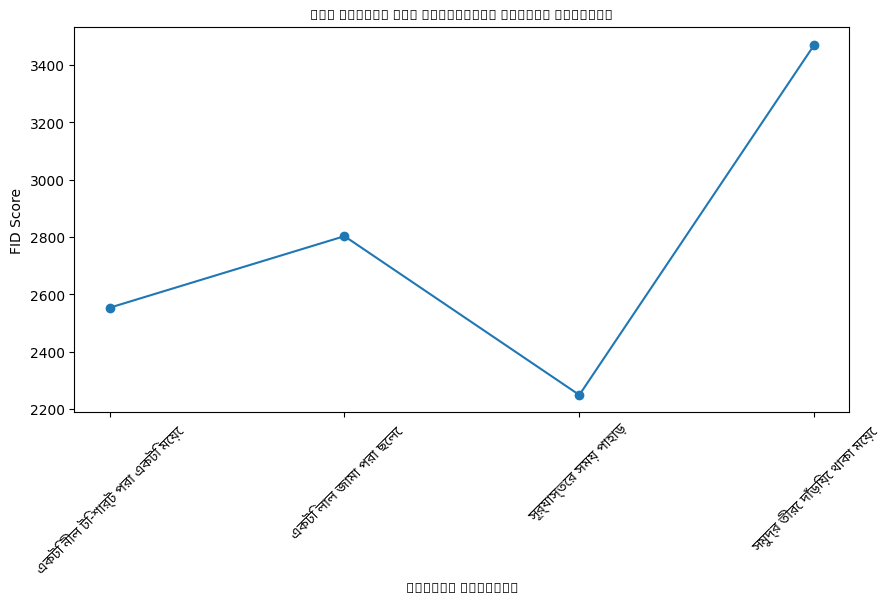

In [23]:
import torch
from torchvision import transforms
from torchvision.models import inception_v3, Inception_V3_Weights
from PIL import Image
from piq import FID
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
import matplotlib.font_manager as fm

# Load the InceptionV3 model with correct weights specification
inception = inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1).eval().cuda()

# Define the transform
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to extract features using InceptionV3
def extract_features(image: Image):
    image_tensor = transform(image).unsqueeze(0).cuda()
    with torch.no_grad():
        features = inception(image_tensor)
    return features.squeeze()

# Load reference images and extract features
reference_images = [
    Image.open("/content/drive/MyDrive/Bangla Image dataset with caption/BAN CAP and BNature/BanglaImageCaptioning/BanCap/1000268201_693b08cb0e.jpg"),
    Image.open("/content/drive/MyDrive/Bangla Image dataset with caption/BAN CAP and BNature/BanglaImageCaptioning/BanCap/1001773457_577c3a7d70.jpg")
]

reference_features = torch.stack([extract_features(img) for img in reference_images])

# Initialize the Stable Diffusion pipeline
pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")

# Define different Bangla prompts for generating images
bangla_prompts = [
    "একটি নীল টি-শার্ট পরা একটি মেয়ে",
    "একটি লাল জামা পরা ছেলে",
    "সূর্যাস্তের সময় পাহাড়",
    "সমুদ্র তীরে দাঁড়িয়ে থাকা মেয়ে"
]

# Initialize a list to store FID scores
fid_scores = []

# Generate images for each prompt, calculate FID score, and store the results
for prompt in bangla_prompts:
    generated_image = pipeline(prompt=prompt).images[0]
    generated_features = extract_features(generated_image)
    generated_features = generated_features.unsqueeze(0).repeat(reference_features.size(0), 1)
    fid_score = FID()(reference_features, generated_features).item()
    fid_scores.append(fid_score)

# Load the Noto Sans Bengali font
bangla_font_path = "/usr/share/fonts/opentype/noto/NotoSansBengali-Regular.ttf"
bangla_font = fm.FontProperties(fname=bangla_font_path)

# Plot the FID scores with Bangla text support
plt.figure(figsize=(10, 5))
plt.plot(bangla_prompts, fid_scores, marker='o')
plt.title("FID Scores for Different Bangla Prompts", fontproperties=bangla_font)
plt.xlabel("Bangla Prompts", fontproperties=bangla_font)
plt.ylabel("FID Score")
plt.xticks(rotation=45, fontproperties=bangla_font)
plt.show()


#ACCuracy

  0%|          | 0/50 [00:00<?, ?it/s]

FID calculation produces singular product; adding 1e-06 to diagonal of cov estimates


/usr/local/lib/python3.10/dist-packages/scipy/linalg/_matfuncs_sqrtm.py:209: RuntimeWarning: invalid value encountered in scalar divide
  arg2 = norm(X.dot(X) - A, 'fro')**2 / norm(A, 'fro')


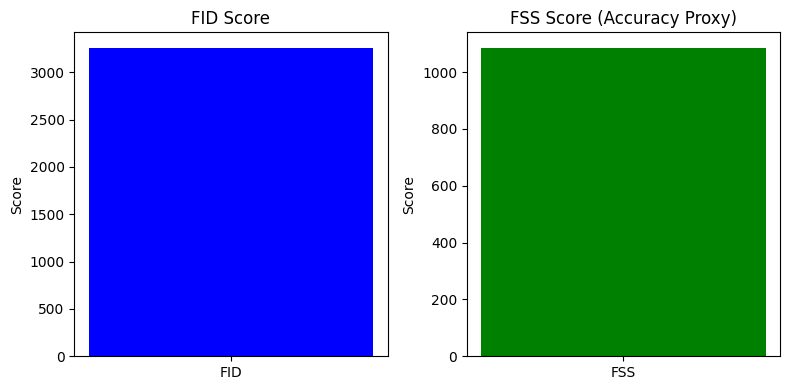

In [30]:
import torch
from torchvision import transforms
from torchvision.models import inception_v3, Inception_V3_Weights
from PIL import Image
from piq import FID
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import sqrtm

# Load the InceptionV3 model with the correct weights specification
inception = inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1).eval().cuda()

# Define the transform for images
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to extract features using InceptionV3
def extract_features(image: Image):
    image_tensor = transform(image).unsqueeze(0).cuda()
    with torch.no_grad():
        features = inception(image_tensor)
    return features.cpu().numpy().squeeze()

# Load reference images and extract features
reference_images = [Image.open("/content/drive/MyDrive/Bangla Image dataset with caption/BAN CAP and BNature/BanglaImageCaptioning/BanCap/1000268201_693b08cb0e.jpg"),
                    Image.open("/content/drive/MyDrive/Bangla Image dataset with caption/BAN CAP and BNature/BanglaImageCaptioning/BanCap/1001773457_577c3a7d70.jpg")]

reference_features = [extract_features(img) for img in reference_images]
reference_features = np.stack(reference_features)

# Calculate mean and covariance for the reference features
mu_ref = np.mean(reference_features, axis=0)
sigma_ref = np.cov(reference_features, rowvar=False)

# Function to calculate FSS (proxy for accuracy)
def calculate_fss(mu1, sigma1, mu2, sigma2):
    # Ensure sigma2 is a 2D covariance matrix even if generated_features is a single image
    if sigma2.ndim == 0:
        sigma2 = np.array([[sigma2]])
    covmean, _ = sqrtm(sigma1 @ sigma2, disp=False)
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    score = np.trace(sigma1 + sigma2 - 2 * covmean)
    return score

# Define a single Bangla prompt
prompt = "একটি নীল টি-শার্ট পরা একটি মেয়ে"

# Generate image for the given prompt and extract features
generated_image = pipeline(prompt=prompt).images[0]
generated_features = extract_features(generated_image).reshape(1, -1)

# Ensure generated_features is compatible with reference features
generated_features = np.repeat(generated_features, reference_features.shape[0], axis=0)

# Calculate FID using tensors for compatibility
generated_features_tensor = torch.from_numpy(generated_features)
reference_features_tensor = torch.from_numpy(reference_features)

fid_score = FID()(reference_features_tensor, generated_features_tensor)

# FSS (Accuracy Proxy) Calculation
mu_gen = np.mean(generated_features, axis=0)
sigma_gen = np.cov(generated_features, rowvar=False)
fss_score = calculate_fss(mu_ref, sigma_ref, mu_gen, sigma_gen)

# Plotting FID and FSS Scores
plt.figure(figsize=(8, 4))

# Plot FID Score
plt.subplot(1, 2, 1)
plt.bar("FID", fid_score.item(), color='blue')
plt.title("FID Score")
plt.ylabel("Score")

# Plot FSS Score (Accuracy Proxy)
plt.subplot(1, 2, 2)
plt.bar("FSS", fss_score, color='green')
plt.title("FSS Score (Accuracy Proxy)")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

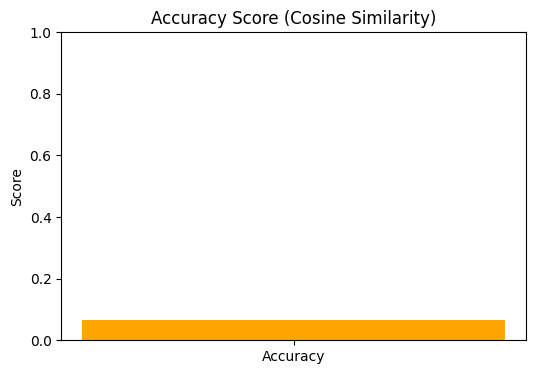

Cosine Similarity (Accuracy Score): 0.0648


In [32]:
import torch
from torchvision import transforms
from torchvision.models import inception_v3, Inception_V3_Weights
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

# Load the InceptionV3 model with the correct weights specification
inception = inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1).eval().cuda()

# Define the transform for images
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to extract features using InceptionV3
def extract_features(image: Image):
    image_tensor = transform(image).unsqueeze(0).cuda()
    with torch.no_grad():
        features = inception(image_tensor)
    return features.cpu().numpy().squeeze()

# Load reference images and extract features
reference_images = [Image.open("/content/drive/MyDrive/Bangla Image dataset with caption/BAN CAP and BNature/BanglaImageCaptioning/BanCap/1000268201_693b08cb0e.jpg"),
                    Image.open("/content/drive/MyDrive/Bangla Image dataset with caption/BAN CAP and BNature/BanglaImageCaptioning/BanCap/1001773457_577c3a7d70.jpg")]

reference_features = [extract_features(img) for img in reference_images]
reference_features = np.array(reference_features)

# Define a single Bangla prompt
prompt = "একটি নীল টি-শার্ট পরা একটি মেয়ে"

# Generate image for the given prompt and extract features
generated_image = pipeline(prompt=prompt).images[0]
generated_features = extract_features(generated_image)

# Calculate cosine similarities between generated features and each reference feature set
cos_similarities = cosine_similarity([generated_features], reference_features)
accuracy_score = np.mean(cos_similarities)  # Average cosine similarity as an accuracy proxy

# Plot Accuracy Score
plt.figure(figsize=(6, 4))
plt.bar("Accuracy", accuracy_score, color='orange')
plt.title("Accuracy Score (Cosine Similarity)")
plt.ylabel("Score")
plt.ylim(0, 1)  # Cosine similarity ranges between 0 and 1
plt.show()

print(f"Cosine Similarity (Accuracy Score): {accuracy_score:.4f}")
